In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler


In [2]:

df = pd.read_csv("/Users/avanigupta/pm-estimation-from-images/data/archive/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_Nep_AQI_Dataset.csv")

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240 entries, 0 to 12239
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   12240 non-null  object 
 1   Filename   12240 non-null  object 
 2   Year       12240 non-null  int64  
 3   Month      12240 non-null  int64  
 4   Day        12240 non-null  int64  
 5   Hour       12240 non-null  object 
 6   AQI        12240 non-null  int64  
 7   PM2.5      12240 non-null  float64
 8   PM10       12240 non-null  float64
 9   O3         11938 non-null  float64
 10  CO         11660 non-null  float64
 11  SO2        10757 non-null  float64
 12  NO2        11800 non-null  float64
 13  AQI_Class  12240 non-null  object 
dtypes: float64(6), int64(4), object(4)
memory usage: 1.3+ MB


,Year,Month,Day,AQI,PM2.5,PM10,O3,CO,SO2,NO2
count,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,11938.000000,11660.000000,10757.000000,11800.000000
mean,2022.947631,2.686111,12.114706,167.626797,142.999267,145.663935,39.491436,101.230361,13.239595,37.843576
std,0.222780,1.774345,8.269053,102.818213,130.745815,104.506951,33.342031,115.910128,9.850507,39.551303
min,2022.000000,2.000000,1.000000,15.000000,4.000000,7.000000,1.000000,0.000000,2.000000,0.670000
25%,2023.000000,2.000000,3.000000,97.000000,35.000000,64.000000,13.000000,4.000000,4.400000,7.000000
50%,2023.000000,2.000000,13.000000,152.000000,70.080000,113.000000,31.000000,52.000000,10.000000,20.000000
75%,2023.000000,3.000000,20.000000,230.000000,257.000000,198.000000,59.660000,174.000000,20.000000,64.000000
max,2023.000000,10.000000,28.000000,450.000000,500.000000,480.000000,225.000000,410.000000,57.000000,169.000000


In [3]:
df.isnull().sum()


Location        0
Filename        0
Year            0
Month           0
Day             0
Hour            0
AQI             0
PM2.5           0
PM10            0
O3            302
CO            580
SO2          1483
NO2           440
AQI_Class       0
dtype: int64

In [4]:
df.isnull().mean() * 100

Location      0.000000
Filename      0.000000
Year          0.000000
Month         0.000000
Day           0.000000
Hour          0.000000
AQI           0.000000
PM2.5         0.000000
PM10          0.000000
O3            2.467320
CO            4.738562
SO2          12.116013
NO2           3.594771
AQI_Class     0.000000
dtype: float64

In [5]:
#Imputation of missing values
pollutants = ["O3", "CO", "SO2", "NO2"]
for col in pollutants:
    df[col] = df[col].fillna(df[col].median())

In [6]:
df.isnull().mean() * 100

Location     0.0
Filename     0.0
Year         0.0
Month        0.0
Day          0.0
Hour         0.0
AQI          0.0
PM2.5        0.0
PM10         0.0
O3           0.0
CO           0.0
SO2          0.0
NO2          0.0
AQI_Class    0.0
dtype: float64

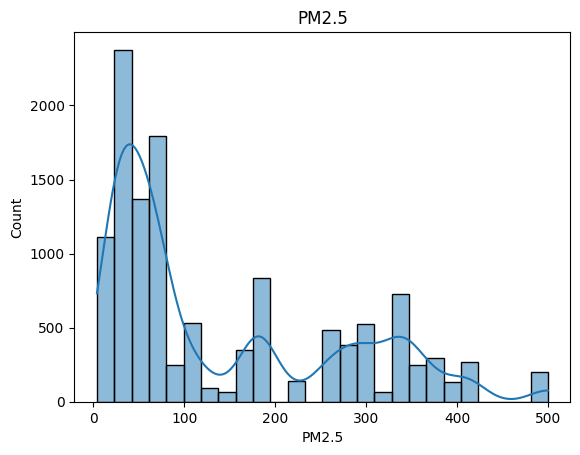

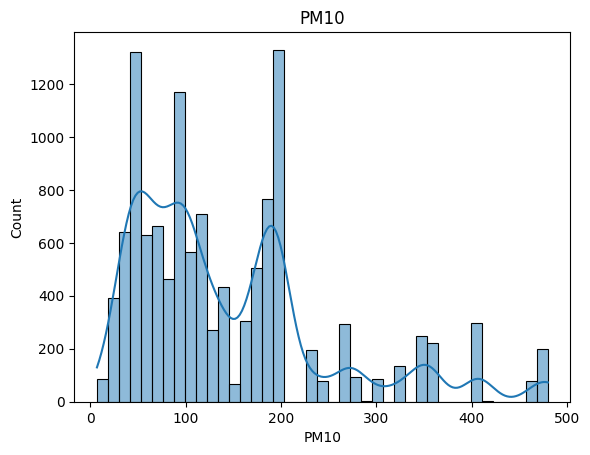

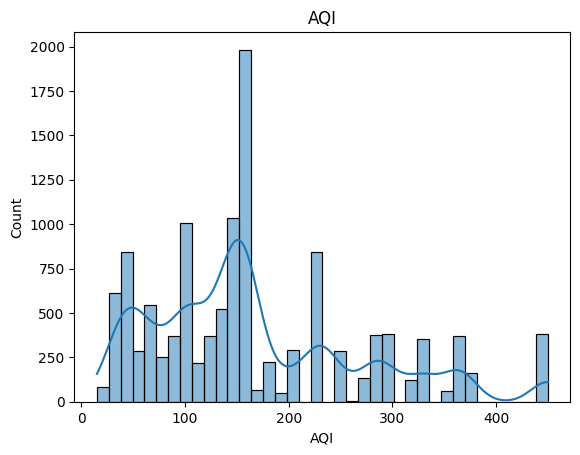

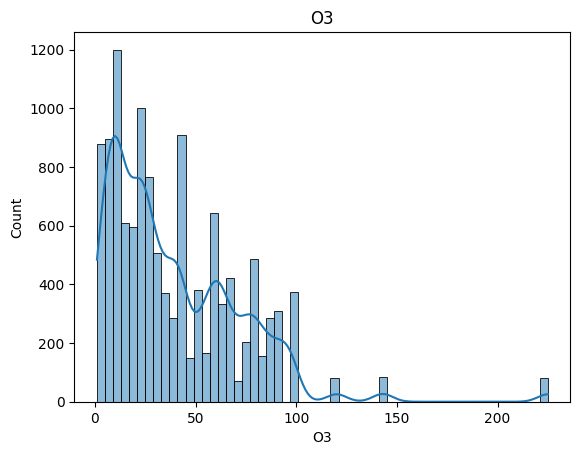

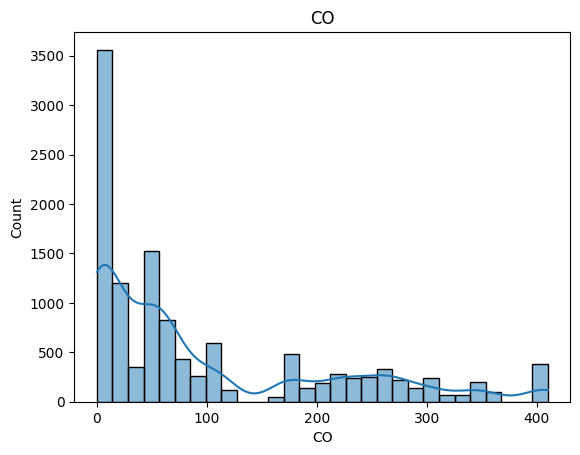

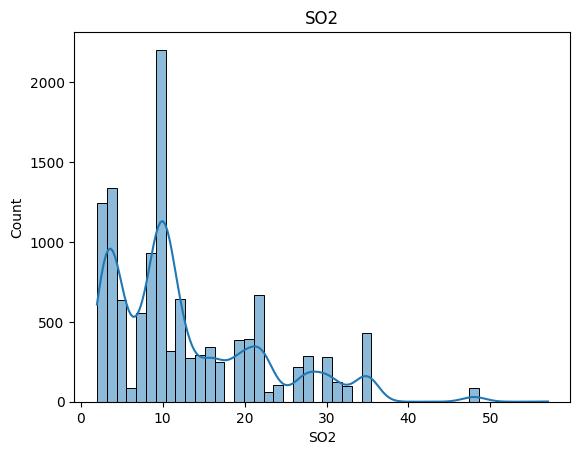

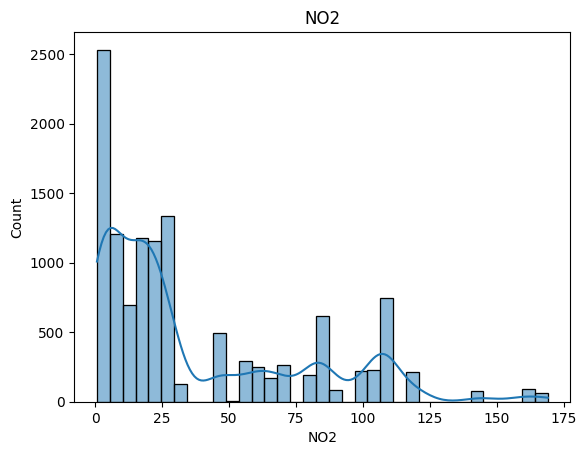

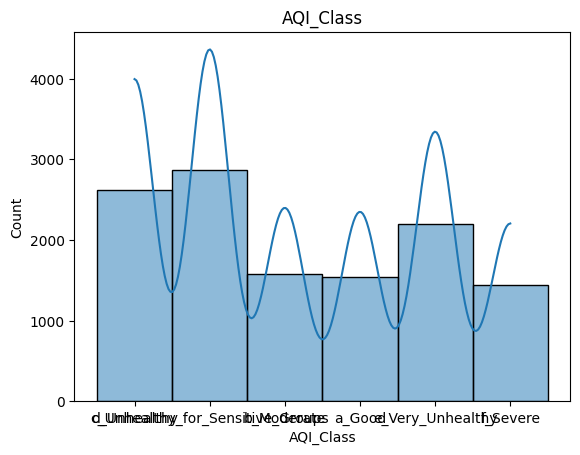

In [7]:
cols = ["PM2.5", "PM10", "AQI", "O3", "CO", "SO2", "NO2", "AQI_Class"]
for c in cols:
    sns.histplot(df[c], kde=True)
    plt.title(c)
    plt.show()

In [8]:
#scaling with robust scaler to be since the distribution is skewed and we must be less sensitive to outlers

In [9]:
le = LabelEncoder()
df['AQI_Class_encoded'] = le.fit_transform(df['AQI_Class'])

<Axes: >

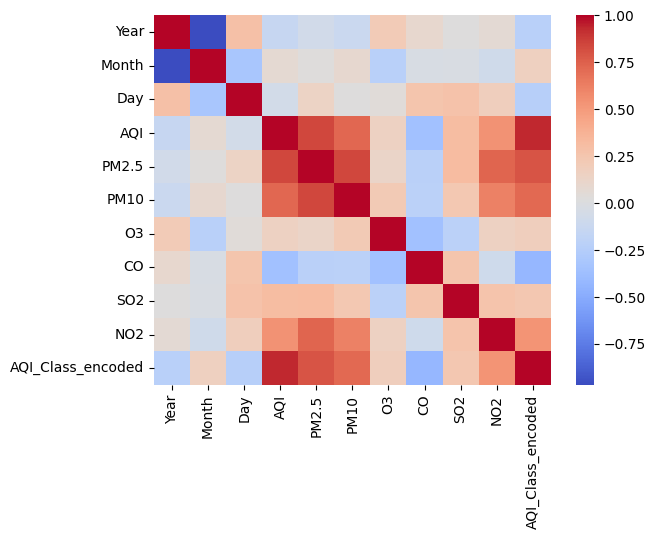

In [10]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")

<Axes: xlabel='AQI_Class'>

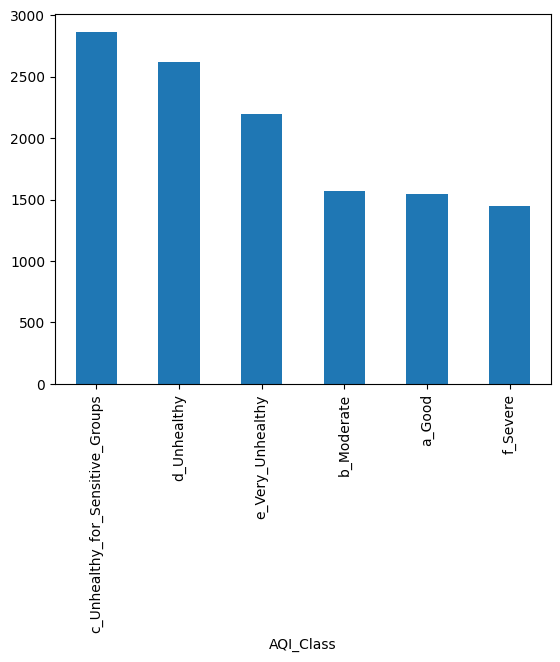

In [11]:
df['AQI_Class'].value_counts().plot(kind='bar')

In [14]:
img_folder = "/Users/avanigupta/pm-estimation-from-images/data/archive/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/"
df['exists'] = df['Filename'].apply(lambda x: os.path.exists(img_folder+x))
df['exists'].value_counts()

exists
True    12240
Name: count, dtype: int64

In [15]:
sizes = []
for f in df['Filename'][:200]:  # sample
    img = Image.open(img_folder+f)
    sizes.append(img.size)

sizes[:10]

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224)]

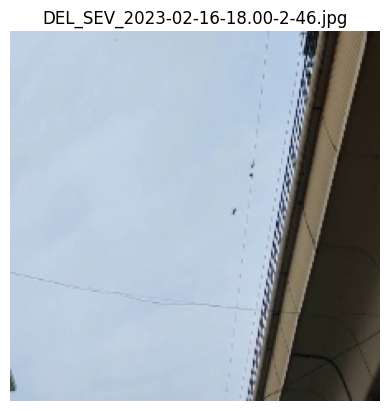

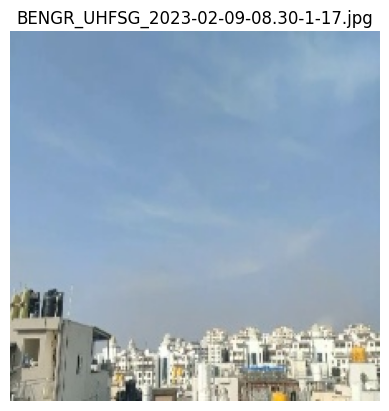

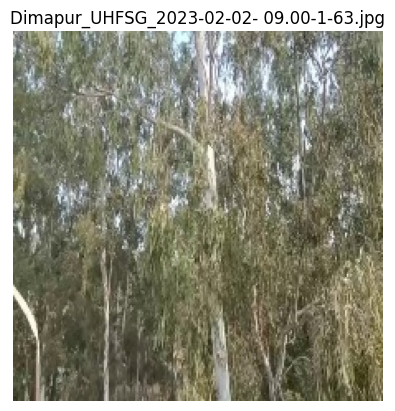

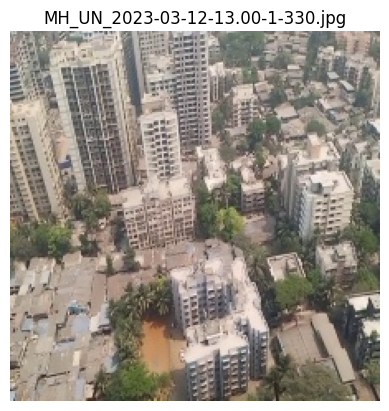

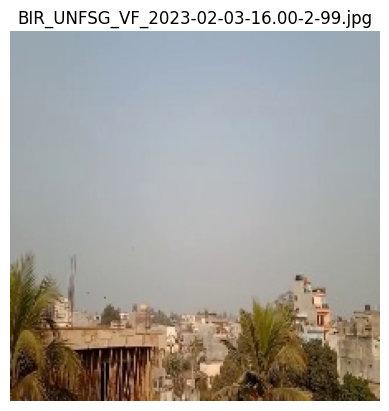

In [16]:
for f in df['Filename'].sample(5):
    img = Image.open(img_folder+ f)
    plt.imshow(img)
    plt.title(f)
    plt.axis('off')
    plt.show()

In [17]:
df.to_csv("/Users/avanigupta/pm-estimation-from-images/data/final_data.csv", index=False)

In [19]:

df = pd.read_csv("/Users/avanigupta/pm-estimation-from-images/data/final_data.csv")

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240 entries, 0 to 12239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           12240 non-null  object 
 1   Filename           12240 non-null  object 
 2   Year               12240 non-null  int64  
 3   Month              12240 non-null  int64  
 4   Day                12240 non-null  int64  
 5   Hour               12240 non-null  object 
 6   AQI                12240 non-null  int64  
 7   PM2.5              12240 non-null  float64
 8   PM10               12240 non-null  float64
 9   O3                 12240 non-null  float64
 10  CO                 12240 non-null  float64
 11  SO2                12240 non-null  float64
 12  NO2                12240 non-null  float64
 13  AQI_Class          12240 non-null  object 
 14  AQI_Class_encoded  12240 non-null  int64  
 15  exists             12240 non-null  bool   
dtypes: bool(1), float64(6)

,Year,Month,Day,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class_encoded
count,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000
mean,2022.947631,2.686111,12.114706,167.626797,142.999267,145.663935,39.281925,98.897550,12.847085,37.202141,2.547059
std,0.222780,1.774345,8.269053,102.818213,130.745815,104.506951,32.954440,113.612871,9.294765,38.975669,1.525845
min,2022.000000,2.000000,1.000000,15.000000,4.000000,7.000000,1.000000,0.000000,2.000000,0.670000,0.000000
25%,2023.000000,2.000000,3.000000,97.000000,35.000000,64.000000,13.000000,6.000000,5.000000,7.000000,1.000000
50%,2023.000000,2.000000,13.000000,152.000000,70.080000,113.000000,31.000000,52.000000,10.000000,20.000000,3.000000
75%,2023.000000,3.000000,20.000000,230.000000,257.000000,198.000000,59.660000,174.000000,19.000000,63.000000,4.000000
max,2023.000000,10.000000,28.000000,450.000000,500.000000,480.000000,225.000000,410.000000,57.000000,169.000000,5.000000


In [20]:
label_cols = ['AQI','PM2.5','PM10','O3','CO','SO2','NO2']

for col in label_cols:
    print(f"{col} range: {df[col].min()} to {df[col].max()}")

AQI range: 15 to 450
PM2.5 range: 4.0 to 500.0
PM10 range: 7.0 to 480.0
O3 range: 1.0 to 225.0
CO range: 0.0 to 410.0
SO2 range: 2.0 to 57.0
NO2 range: 0.67 to 169.0
